In [2]:
import math
import numpy as np
import networkx as nx

In [65]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 14,
          'figure.figsize': (14, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12,
         'figure.autolayout': True}
plt.rcParams.update(params)

In [17]:
import time

def measure_average_time_ns(action, iterations):
    start_time = time.time_ns()
    for _ in range(iterations):
        action()
    end_time = time.time_ns()
    return (end_time - start_time) / iterations

In [9]:
n = 100
m = 500
matrix = np.zeros((n, n))

def get_random_vertices_without_edge():
    while True:
        u, v = np.random.choice(list(range(n)), 2, replace=False)
        if matrix[u][v] == 0:
            return u, v

matrix = np.zeros((n, n))
for _ in range(m):
    u, v = get_random_vertices_without_edge()
    matrix[u][v] = matrix[v][u] = np.random.randint(1, 100)

In [6]:
g = [[] for _ in range(n)]
for u in range(n):
    for v in range(u + 1, n):
        if matrix[u][v] > 0:
            g[u].append((v, matrix[u][v]))
            g[v].append((u, matrix[u][v]))

In [10]:
G = nx.Graph()
G.add_nodes_from(list(range(n)))
G.add_weighted_edges_from([(u, v, matrix[u][v]) for u in range(n) for v in range(u + 1, n) if matrix[u][v] > 0])
G.number_of_nodes(), G.number_of_edges()

(100, 500)

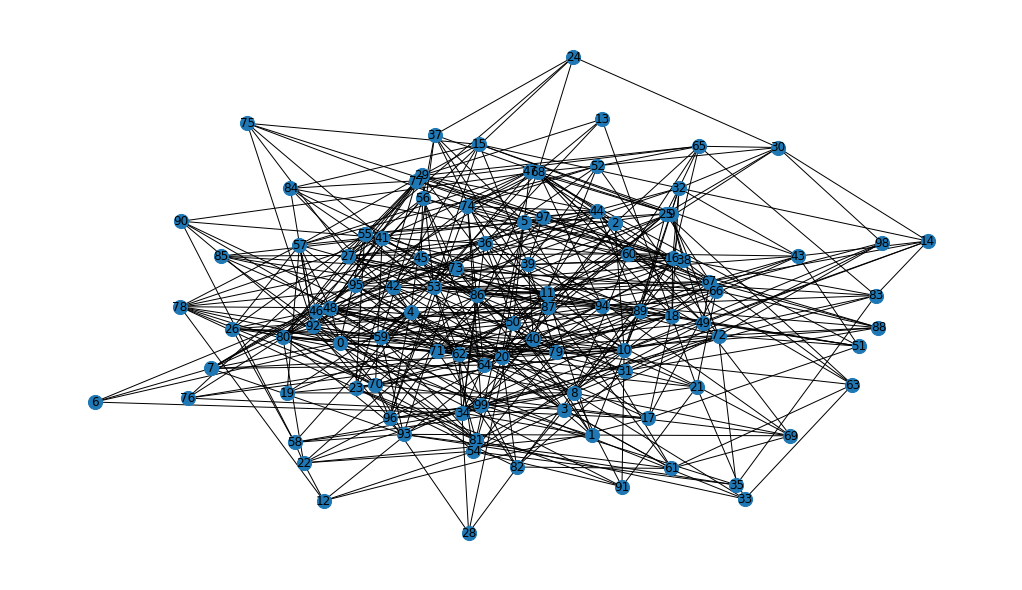

In [11]:
nx.draw(G, with_labels=True, node_size=200)

In [44]:
from networkx.algorithms import shortest_path

start_v = np.random.randint(0, n)

def dijkstra():
    return shortest_path(G, source=start_v, weight='weight', method='dijkstra')

def bellman_ford():
    return shortest_path(G, source=start_v, weight='weight', method='bellman-ford')

In [45]:
dijkstra_time_ns = measure_average_time_ns(lambda: dijkstra(), 10)
bellman_ford_time_ns = measure_average_time_ns(lambda: bellman_ford(), 10)
print("dijkstra     time ms = %f" % (dijkstra_time_ns / 1e6))
print("bellman ford time ms = %f" % (bellman_ford_time_ns / 1e6))

dijkstra     time ms = 0.796600
bellman ford time ms = 2.054300


In [144]:
params = {'figure.figsize': (5, 15)}
plt.rcParams.update(params)

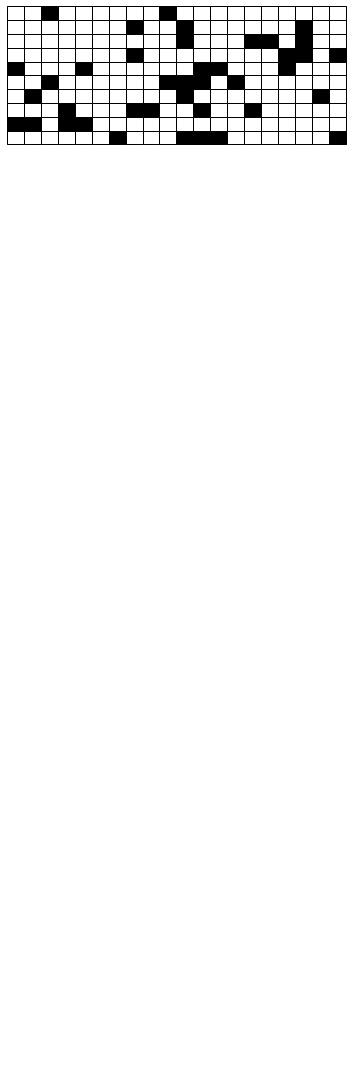

In [155]:
obstacle = [(index // 20, index % 20) for index in np.random.choice(list(range(10 * 20)), 40, replace=False)]

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('tight')
ax.axis('off')
colors = [['w' for j in range(20)] for i in range(10)]
for i, j in obstacle:
    colors[i][j] = 'k'
ax.table(cellColours=colors, loc='top')
plt.show()

In [156]:
G = nx.Graph()
G.add_nodes_from(list(range(10 * 20)))
di = [0, 1]
dj = [1, 0]
for i in range(10):
    for j in range(20):
        if colors[i][j] == 'k':
            continue
        for k in range(len(di)):
            ui, uj = i + di[k], j + dj[k]
            if ui >= 10 or uj >= 20 or colors[ui][uj] == 'k':
                continue
            G.add_edge(i * 20 + j, ui * 20 + uj)
G.number_of_nodes(), G.number_of_edges()

(200, 238)

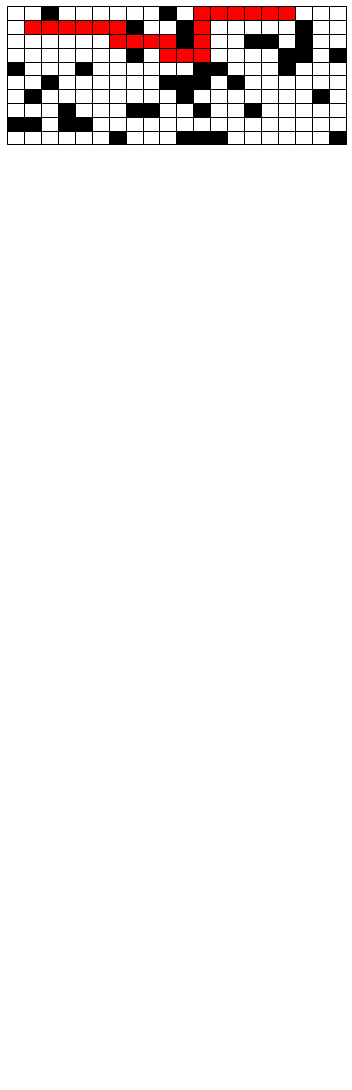

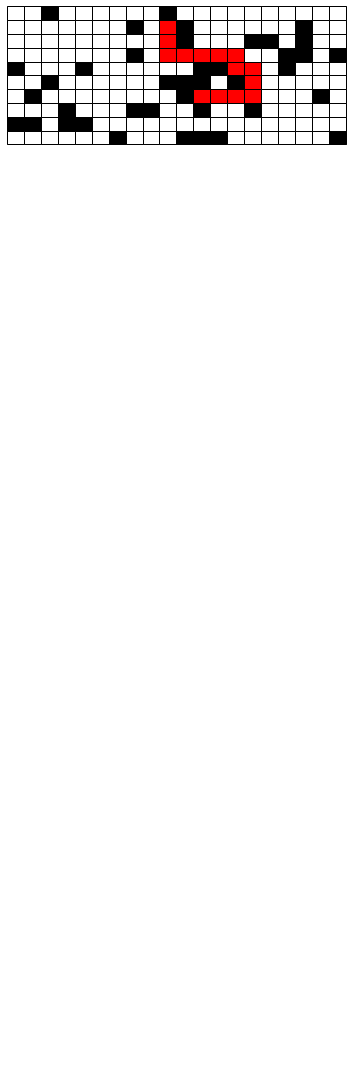

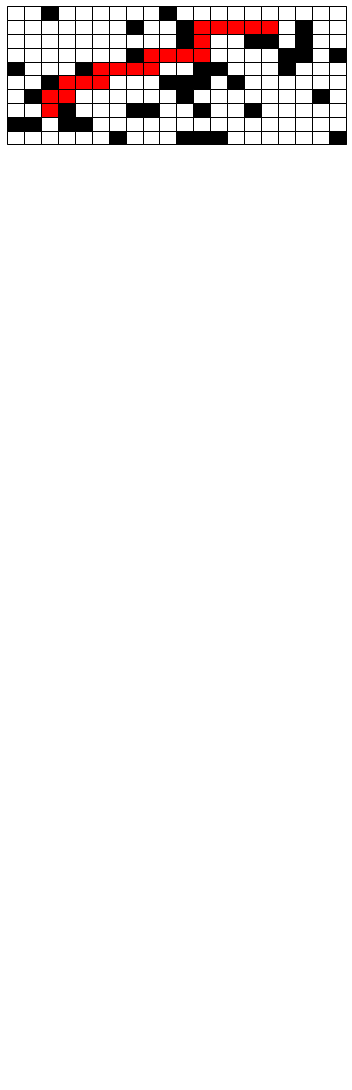

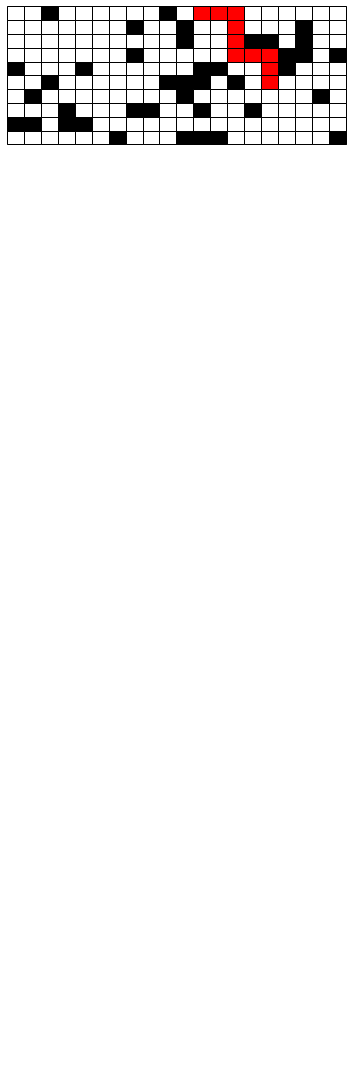

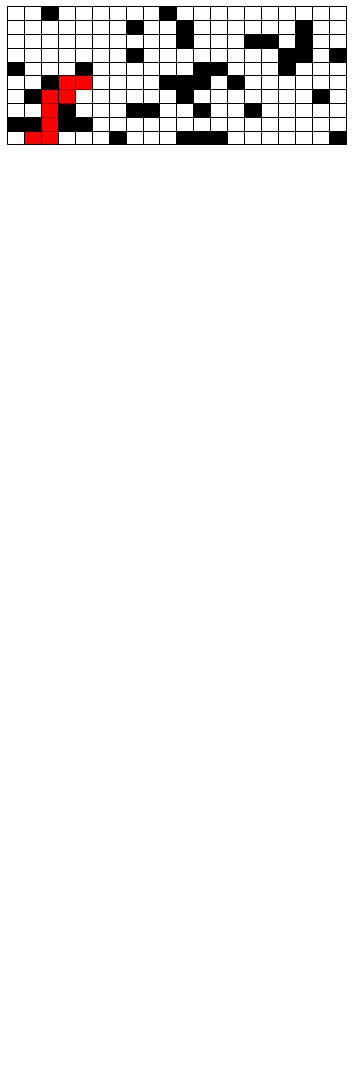

In [157]:
from networkx.algorithms import astar_path
import copy

def grid_dist(u, v):
    return abs((u // 20) - (v // 20)) + abs((u % 20)  - (v % 20))

for _ in range(5):
    while True:
        index1, index2 = np.random.choice(list(range(10 * 20)), 2, replace=False)
        if colors[index1 // 20][index1 % 20] == 'w' and colors[index1 // 20][index1 % 20] == 'w':
            break
    path = astar_path(G, index1, index2, heuristic=grid_dist)
    tmp = copy.deepcopy(colors)
    for u in path:
        i, j = u // 20, u % 20
        tmp[i][j] = 'r'

    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellColours=tmp, loc='top')
    plt.show()